# Color Classification

In [28]:
import os
import pandas as pd
import numpy as np
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

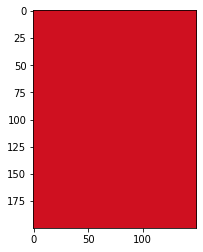

In [29]:
citra = cv2.cvtColor(cv2.imread('./training_dataset/red/red19.png'), cv2.COLOR_BGR2RGB)
plt.imshow(citra)

In [30]:
rgb = []
color = []

for dirname, _, filenames in os.walk('F:/CapstoneTA/coba_color/coba1/training_dataset'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        rgb.append(image[0][0])
        color.append(dirname[48:])
       

In [31]:
rgb_df = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue'])
rgb_df.head()

,red,green,blue
0,10,5,2
1,17,0,17
2,29,24,23
3,47,47,47
4,28,29,33


In [32]:
color_df = pd.DataFrame(
    {
        'color': color
    }
)

color_df.head()

,color
0,black
1,black
2,black
3,black
4,black


In [33]:
df = rgb_df.join(color_df)
df.head()

,red,green,blue,color
0,10,5,2,black
1,17,0,17,black
2,29,24,23,black
3,47,47,47,black
4,28,29,33,black


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     250 non-null    uint8 
 1   green   250 non-null    uint8 
 2   blue    250 non-null    uint8 
 3   color   250 non-null    object
dtypes: object(1), uint8(3)
memory usage: 2.8+ KB


In [35]:
df['color'].nunique()

10

In [36]:
red = df['red']
green = df['green']
blue = df['blue']

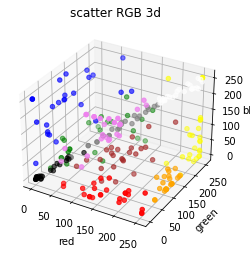

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(red, green, blue, c=df['color'])
ax.set(title='scatter RGB 3d',
      xlabel='red',
      ylabel='green',
      zlabel='blue')
plt.show()

In [38]:
X = df.iloc[:, 0:3]
y= df.iloc[:, -1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
k = 30
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    neighbors.append(i+1)
    accuracy.append(accuracy_score(y_test, y_pred))

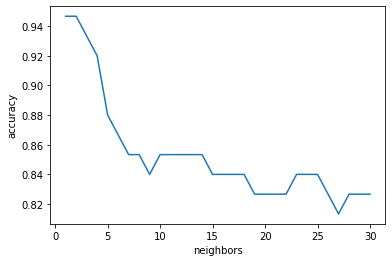

In [41]:
plt.plot(neighbors, accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

In [42]:
accuracy_df = pd.DataFrame(
    {
        'neighbors': neighbors,
        'accuracy': accuracy
    }
)

accuracy_df.head()

,neighbors,accuracy
0,1,0.946667
1,2,0.946667
2,3,0.933333
3,4,0.920000
4,5,0.880000


In [43]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn = knn.fit(X_train, y_train)

In [44]:
y_pred = knn.predict(X_test)

In [45]:
pd.DataFrame(
    {
        'y_actual': y_test,
        'y_predict': y_pred
    }
)

,y_actual,y_predict
225,yellow,yellow
122,grey,grey
92,green,green
157,red,red
154,red,red
...,...,...
240,yellow,yellow
210,white,white
170,red,red
16,black,black


In [46]:
accuracy_score(y_test, y_pred)

0.9466666666666667

In [47]:
print(X_test.head())

     red  green  blue
225  213    182    10
122  102    106   109
92    64    189    85
157  148     17     0
154  119      0     1


In [48]:
import pickle

filename = 'model.pkl'
pickle.dump(knn, open(filename, 'wb'))

##### Test Model

In [49]:
model = pickle.load(open('model.pkl','rb'))

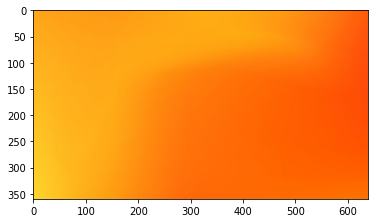

In [50]:
citra = cv2.cvtColor(cv2.imread('./data_coba/coba.png'), cv2.COLOR_BGR2RGB)
plt.imshow(citra)

In [51]:
rgb2 = []
image = cv2.cvtColor(cv2.imread('F:/CapstoneTA/coba_color/coba1/data_coba/coba.png'), cv2.COLOR_BGR2RGB)

# for dirname, _, filename in os.walk('F:/CapstoneTA/coba_color/coba1/data_coba'):
#     print(filename[0])
#     image = cv2.cvtColor(cv2.imread(os.path.join(dirname[0], filename[0])), cv2.COLOR_BGR2RGB)
#     print(os.path.join(dirname[0], filename[0]))
rgb2.append(image[0][0])

print(rgb2)

[array([255, 165,  27], dtype=uint8)]


In [52]:
rgb_df2 = pd.DataFrame(np.array(rgb2), columns=['red', 'green', 'blue'])
rgb_df2.head()

,red,green,blue
0,255,165,27


In [53]:
y_pred2 = model.predict(rgb_df2)

In [54]:
print(y_pred2)

['orange']
